# **Capstone project: Providing Data-Driven Suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


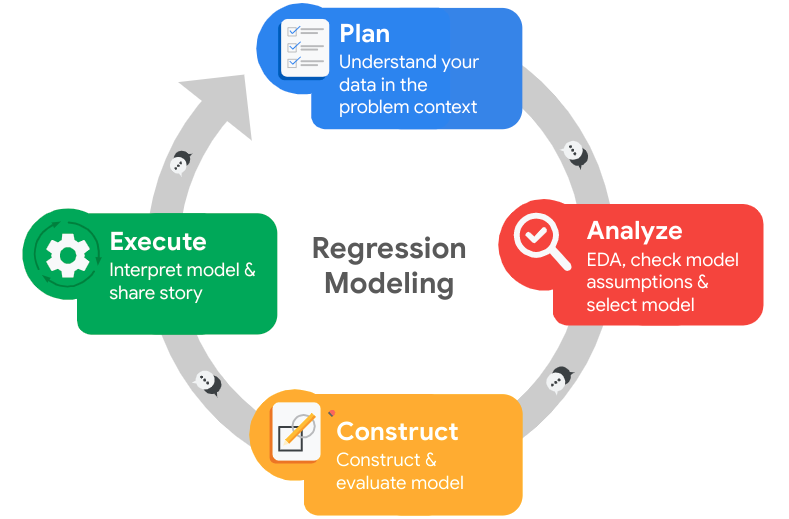

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




HR department at Salifort Motors
A model to predict whether or not an employee will leave the company


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [261]:
# Import packages
import numpy as np
import pandas as pd

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as metrics

# Visualization package imports.
import seaborn as sns
import matplotlib.pyplot as plt

# This is the classifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance 
from xgboost import plot_importance

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score,\
f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

# This displays all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# This module lets us save our models once we fit them.
import os
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [31]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("datasets/HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [7]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [8]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [9]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [45]:
def rename_columns_snake_case(df0):
    """
    Renames the columns of a Pandas DataFrame to snake_case,
    corrects misspellings, and makes them more concise.

    """

    # Create a dictionary to map old column names to new snake_case names.
    new_columns = {}
    for col in df0.columns:
        # Convert to lowercase, replace spaces and special characters with underscores.
        new_col = col.lower().replace(' ', '_').replace('-', '_').replace('.', '_')
        # Remove any leading or trailing underscores.
        new_col = new_col.strip('_')
        # Remove any double underscores and other unneeded characters.
        while '__' in new_col:
            new_col = new_col.replace('__', '_')
        new_columns[col] = new_col

    # Rename the columns using the dictionary.
    df0 = df0.rename(columns=new_columns)

    return df0

df0 = rename_columns_snake_case(df0)

#Correct misspellings in the column names.
df0.rename(columns = {'average_montly_hours': 'average_monthly_hours'}, inplace=True)

# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [46]:
# Check for missing values
df0.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [47]:
# Check for duplicates
df0.duplicated().sum()



np.int64(3008)

In [48]:
# Inspect some rows containing duplicates as needed
duplicates = df0[df0.duplicated(keep=False)]
duplicates.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [50]:
# Find all rows that are duplicates of the first row in 'duplicates'
first_duplicate_row = duplicates.iloc[0]  # Get the first row from duplicates

matching_rows = df0[(df0['satisfaction_level'] == first_duplicate_row['satisfaction_level']) &
                     (df0['last_evaluation'] == first_duplicate_row['last_evaluation']) &
                     (df0['number_project'] == first_duplicate_row['number_project']) &
                     (df0['average_monthly_hours'] == first_duplicate_row['average_monthly_hours']) &
                     (df0['time_spend_company'] == first_duplicate_row['time_spend_company']) &
                     (df0['work_accident'] == first_duplicate_row['work_accident']) &
                     (df0['left'] == first_duplicate_row['left']) &
                     (df0['promotion_last_5years'] == first_duplicate_row['promotion_last_5years']) &
                     (df0['department'] == first_duplicate_row['department']) &
                     (df0['salary'] == first_duplicate_row['salary'])]

print('\nMatching Rows:\n', matching_rows)



Matching Rows:
        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
12000                0.38             0.53               2   
14211                0.38             0.53               2   

       average_monthly_hours  time_spend_company  work_accident  left  \
0                        157                   3              0     1   
12000                    157                   3              0     1   
14211                    157                   3              0     1   

       promotion_last_5years department salary  
0                          0      sales    low  
12000                      0      sales    low  
14211                      0      sales    low  


In [51]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df0 = df0.drop_duplicates()
# Check for duplicates again to confirm they were dropped
df0.duplicated().sum()

# Display first few rows of new dataframe as needed
df0.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

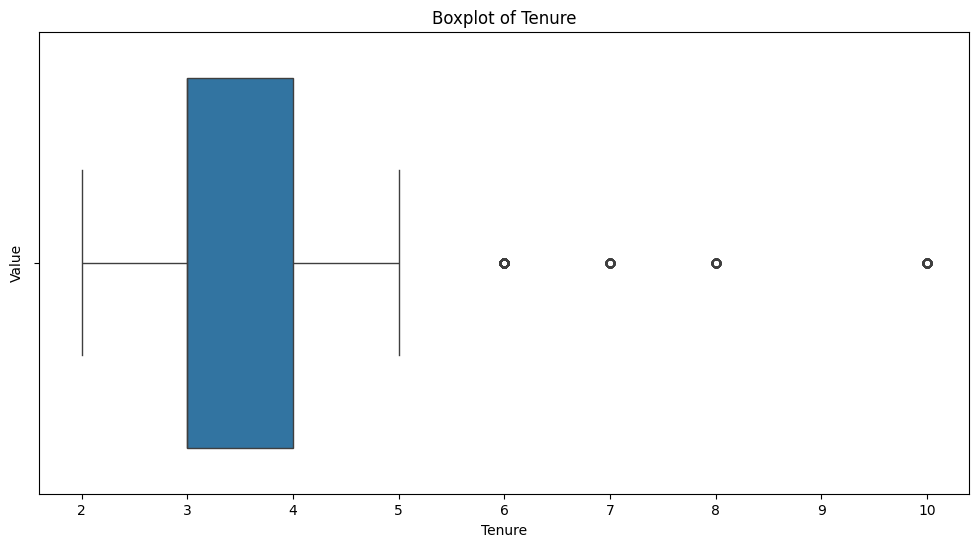

In [52]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='time_spend_company', data=df0)
plt.title('Boxplot of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Value')
plt.show()



In [53]:
# Create iqr for 'tenure' to remove outliers
Q1 = df0['time_spend_company'].quantile(0.25)
Q3 = df0['time_spend_company'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(f"Upper Bound: {upper_bound}, Lower Bound: {lower_bound}")
# Filter out outliers
df1 = df0[(df0['time_spend_company'] >= lower_bound) & (df0['time_spend_company'] <= upper_bound)]
# Display first few rows of new dataframe as needed
df1.head()


Upper Bound: 5.5, Lower Bound: 1.5


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [54]:
# Get numbers of people who left vs. stayed
df1['left'].value_counts(normalize=True)

# Get percentages of people who left vs. stayed
df1['left'].value_counts(normalize=True) * 100

left
0    83.146772
1    16.853228
Name: proportion, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11167 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11167 non-null  float64
 1   last_evaluation        11167 non-null  float64
 2   number_project         11167 non-null  int64  
 3   average_monthly_hours  11167 non-null  int64  
 4   time_spend_company     11167 non-null  int64  
 5   work_accident          11167 non-null  int64  
 6   left                   11167 non-null  int64  
 7   promotion_last_5years  11167 non-null  int64  
 8   department             11167 non-null  object 
 9   salary                 11167 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 959.7+ KB


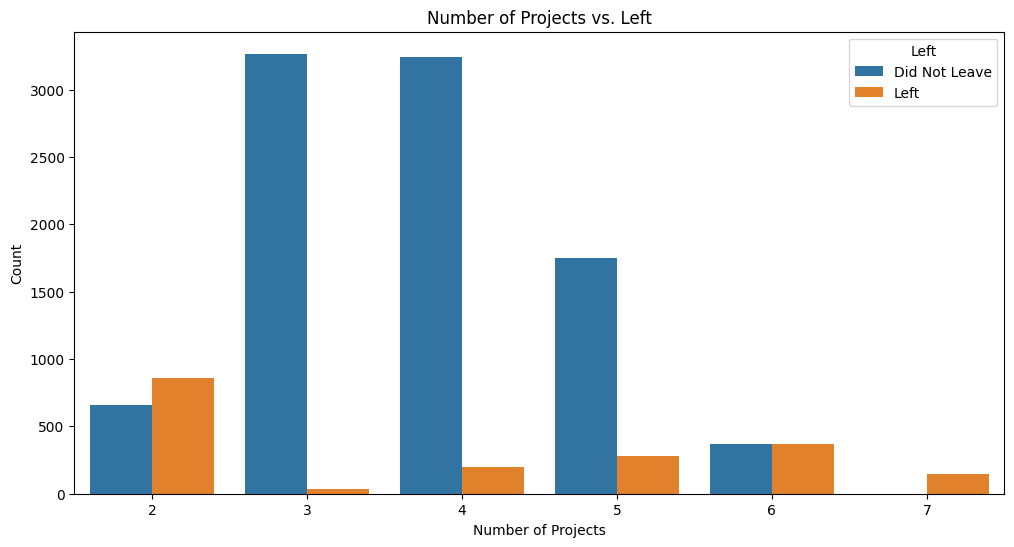

In [84]:
# Create a plot based 'number_project' and 'left' columns
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='number_project', hue='left')
plt.title('Number of Projects vs. Left')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.legend(title='Left', loc='upper right', labels=['Did Not Leave', 'Left'])
plt.show()


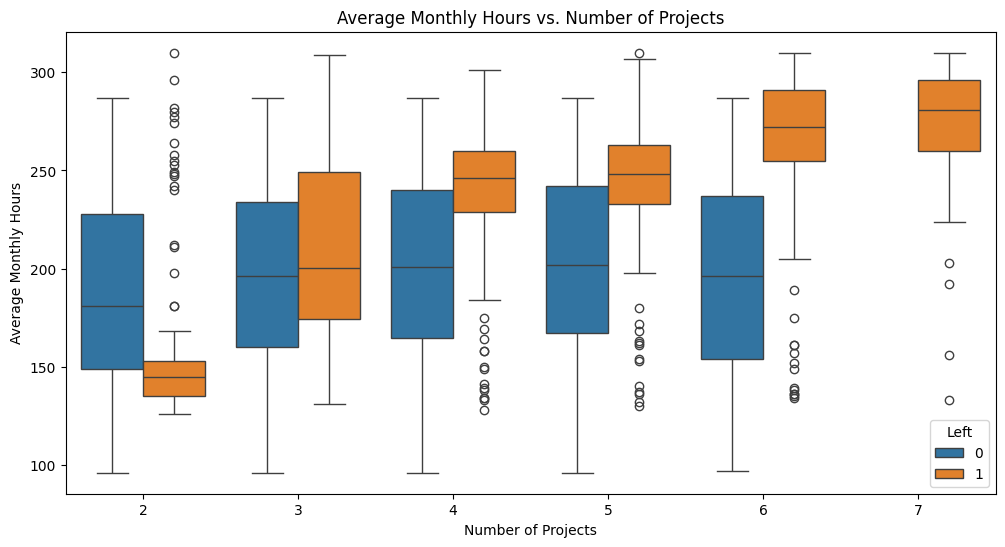

In [74]:
# Create a boxplot based on 'average_montly_hours' and 'number of projects' and visualize who left vs. who stayed
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='number_project', y='average_monthly_hours', hue='left')
plt.title('Average Monthly Hours vs. Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Average Monthly Hours')
plt.legend(title='Left')
plt.show()


It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255–295 hours/month—much more than any other group.

The optimal number of projects for employees to work on seems to be 3–4. The ratio of left/stayed is very small for these cohorts.

If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month. This means that, aside from the employees who worked on two projects, every group—even those who didn't leave the company—worked considerably more hours than this. It seems that employees here are overworked.

As the next step, you could confirm that all employees with seven projects left.

In [78]:
# Number of Project = 7 and left
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

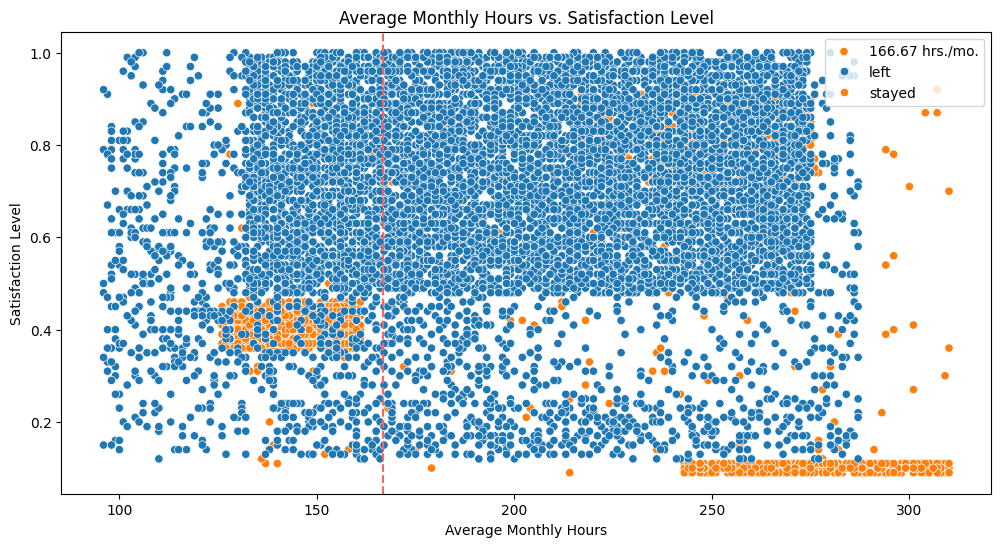

In [80]:
# Create a scatterplot to visualize the relationship between 'average_monthly_hours' and 'satisfaction_level'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left')
plt.title('Average Monthly Hours vs. Satisfaction Level')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.show()


The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data.

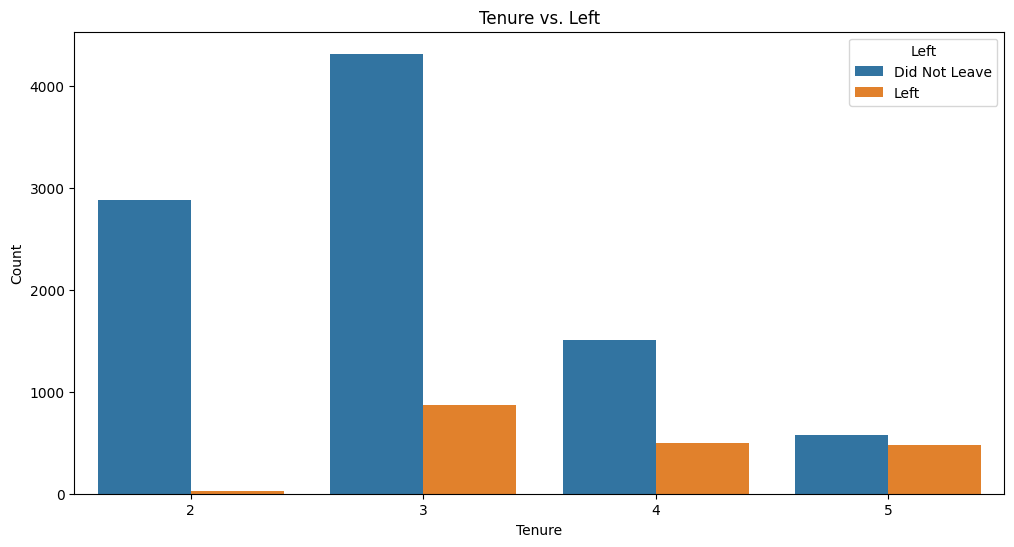

In [85]:
# Create a countplot based on 'tenure' and 'left' columns
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='time_spend_company', hue='left')
plt.title('Tenure vs. Left')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(title='Left', loc='upper right', labels=['Did Not Leave', 'Left'])
plt.show()


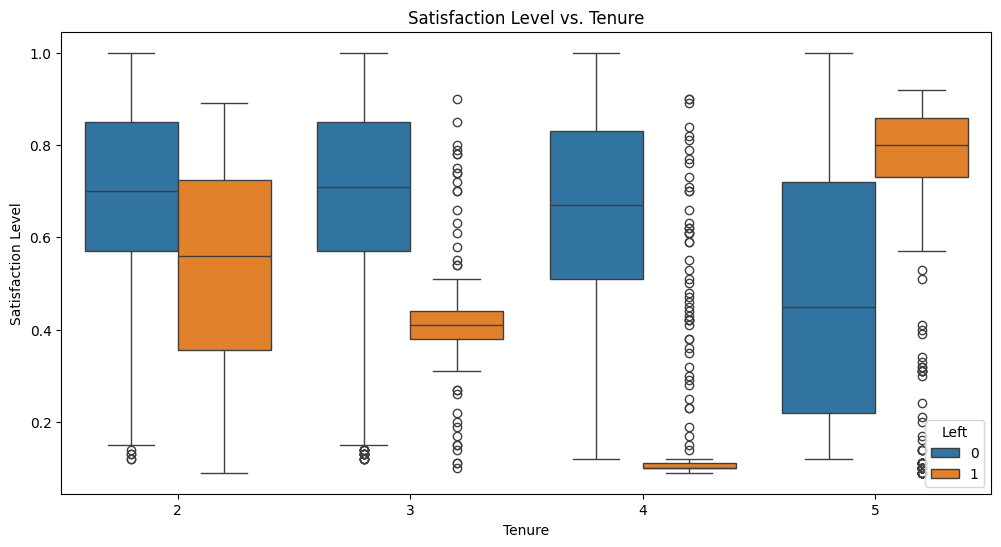

In [86]:
# Create a boxplot based on 'satisfaction_level' and 'tenure' columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='time_spend_company', y='satisfaction_level', hue='left')
plt.title('Satisfaction Level vs. Tenure')
plt.xlabel('Tenure')
plt.ylabel('Satisfaction Level')
plt.legend(title='Left')
plt.show()


There are many observations you could make from this plot.

Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.

Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.

The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.

The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

As the next step in analyzing the data, you could calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [88]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed

df1.groupby(['left'])['satisfaction_level'].agg(["mean", "median"])


,mean,median
left,,
0,0.674999,0.69
1,0.419527,0.40



As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

Next, you could examine salary levels for different tenures.

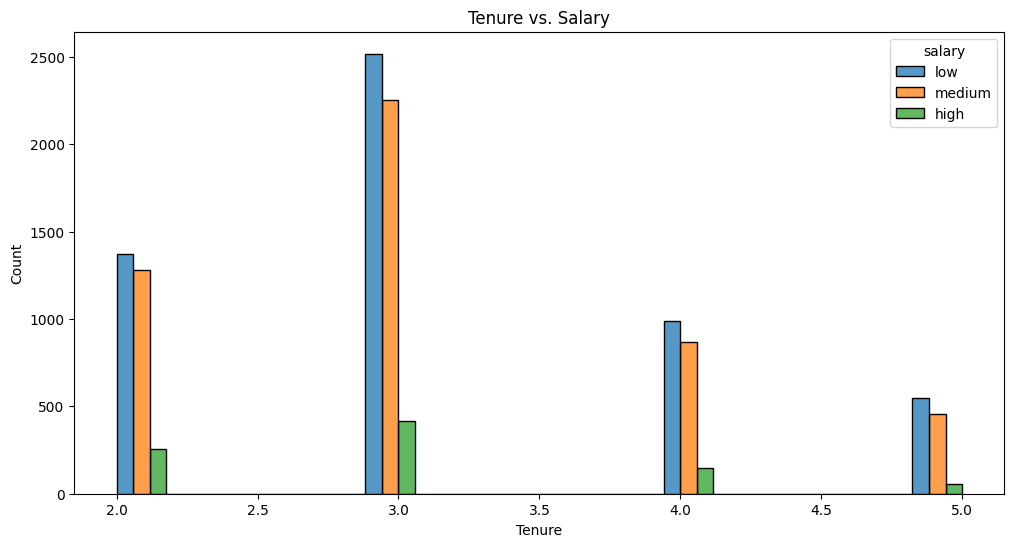

In [95]:
# Create a histplot based on 'tenure' and 'salary' columns
plt.figure(figsize=(12, 6))
sns.histplot(data=df1, x='time_spend_company', hue='salary', multiple='dodge')
plt.title('Tenure vs. Salary')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()


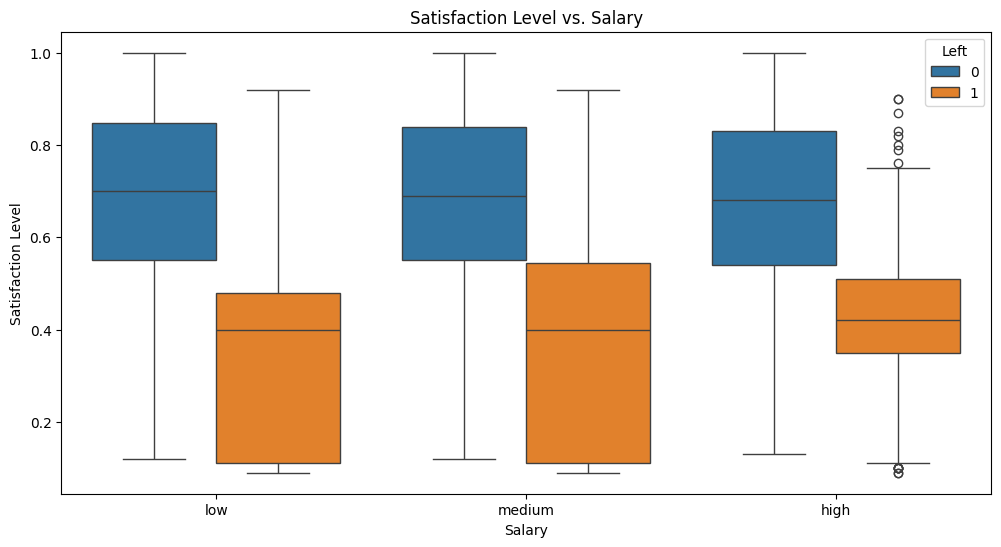

In [90]:
# Create a boxplot based on 'satisfaction_level' and 'salary' columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='salary', y='satisfaction_level', hue='left')
plt.title('Satisfaction Level vs. Salary')
plt.xlabel('Salary')
plt.ylabel('Satisfaction Level')
plt.legend(title='Left')
plt.show()


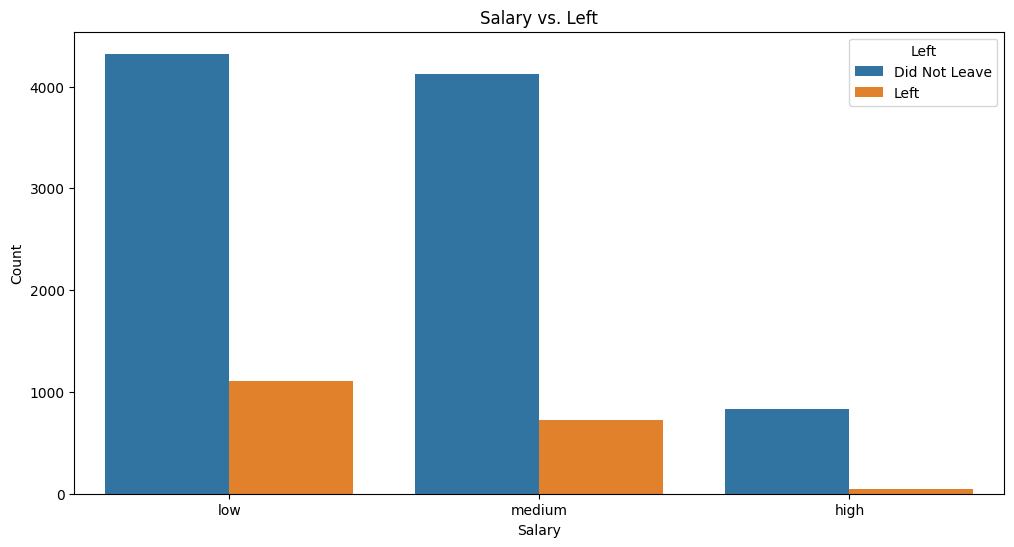

In [97]:
# Create a countplot based on 'salary' and 'left' columns
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='salary', hue='left')
plt.title('Salary vs. Left')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.legend(title='Left', loc='upper right', labels=['Did Not Leave', 'Left'])
plt.show()

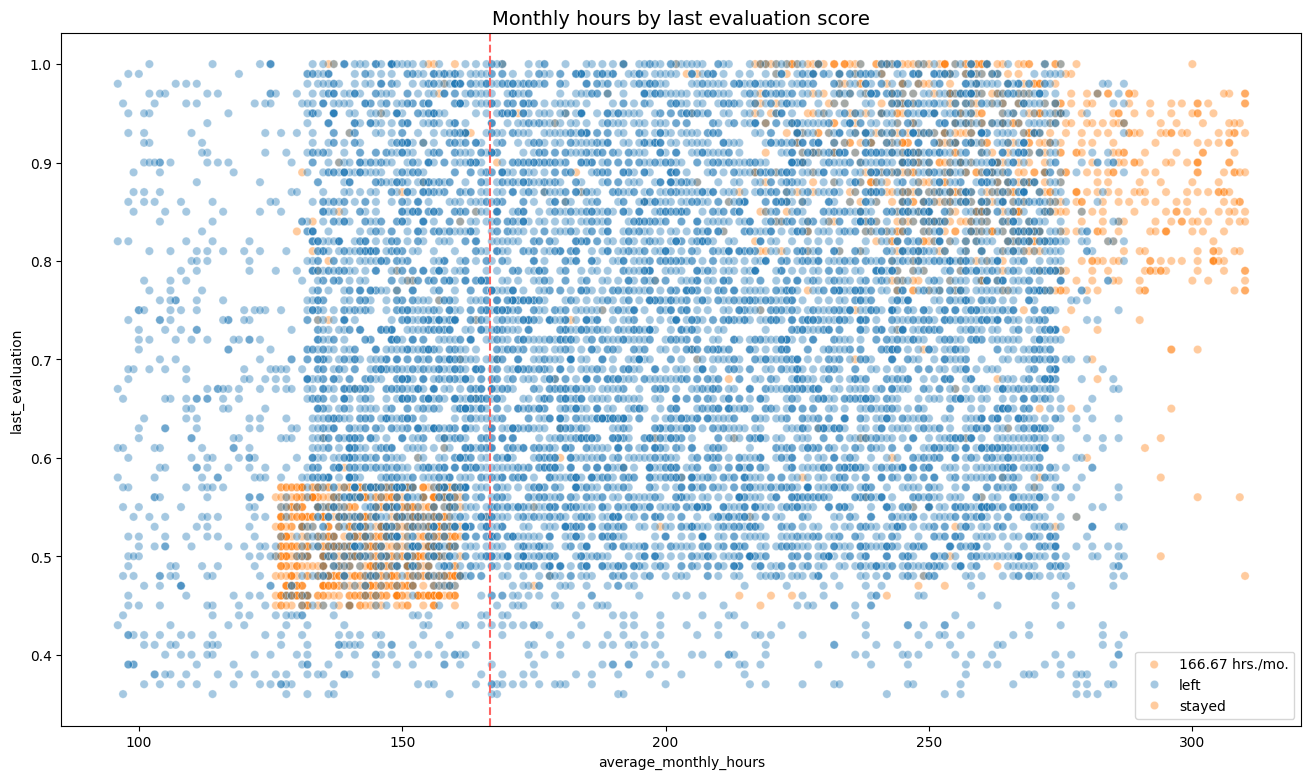

In [98]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

Next, you could examine whether employees who worked very long hours were promoted in the last five years.

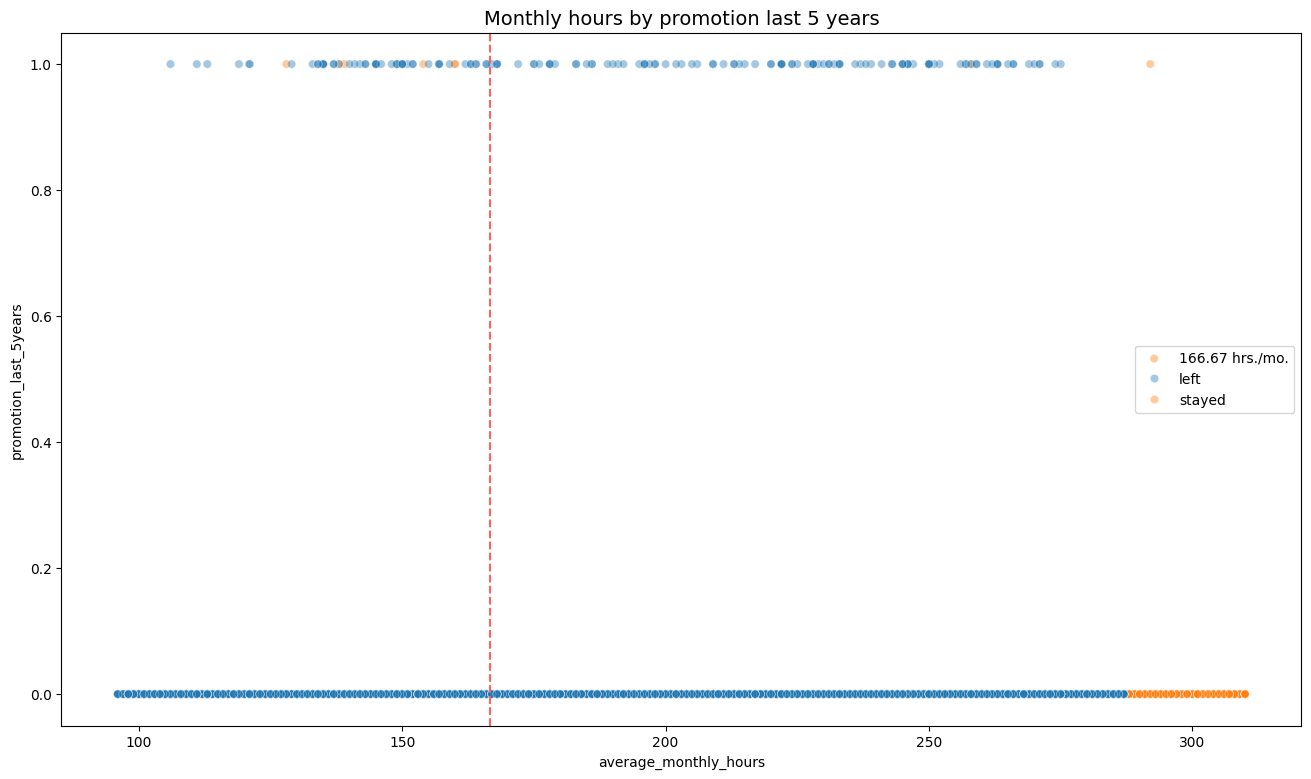

In [99]:
# Create scatterplot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');
plt.show()


The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  

Next, you could inspect how the employees who left are distributed across departments.

In [101]:
# Display counts for each department
df1['department'].value_counts(normalize=True) * 100

department
sales          26.838005
technical      18.930778
support        15.411480
IT              8.193785
RandD           5.811767
product_mng     5.740127
marketing       5.525208
accounting      5.220740
hr              5.104325
management      3.223784
Name: proportion, dtype: float64

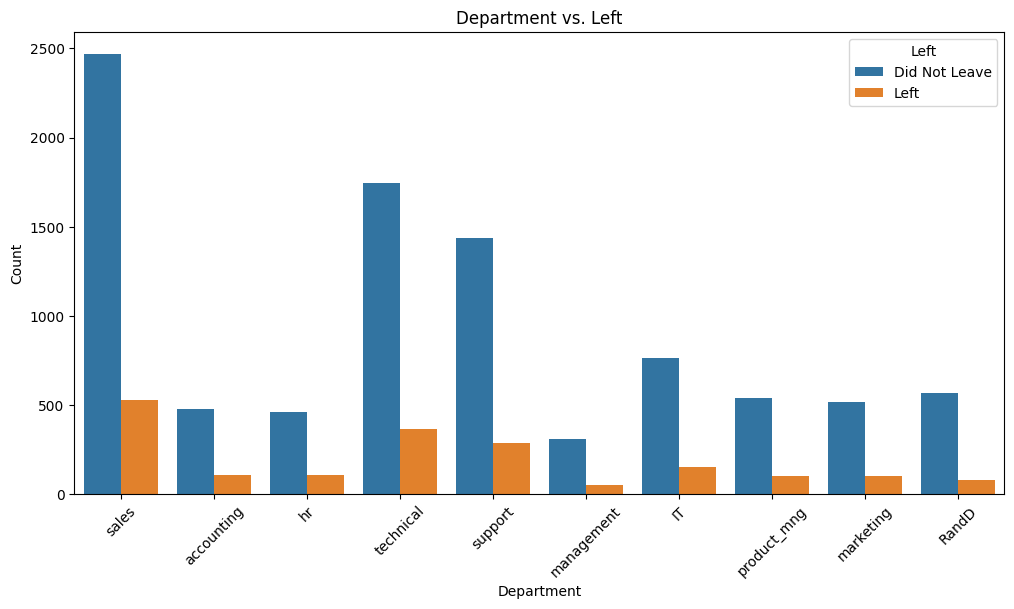

In [102]:
# Create a countplot based on 'department' and 'left' columns
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='department', hue='left')
plt.title('Department vs. Left')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Left', loc='upper right', labels=['Did Not Leave', 'Left'])
plt.xticks(rotation=45)
plt.show()


There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed. 

Lastly, you could check for strong correlations between variables in the data.

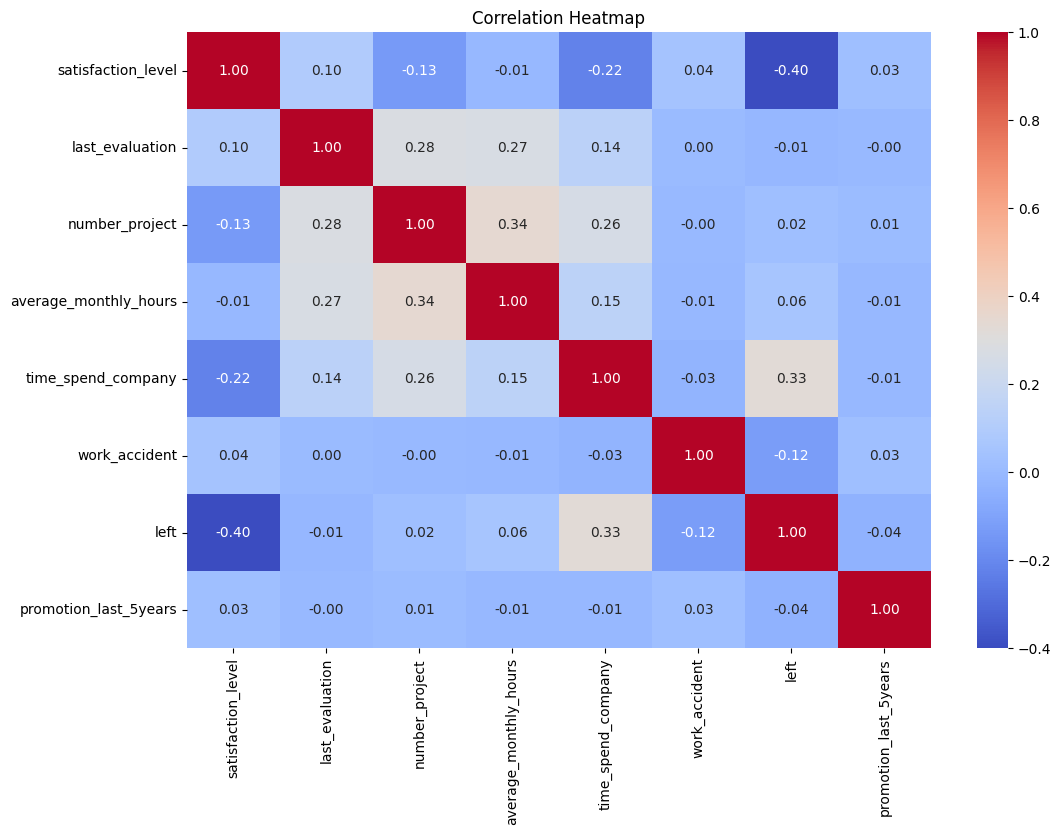

In [106]:
#Plot a correlation heatmap to visualize relationships between features
#get the non numeric columns.
non_numeric_cols = df1.select_dtypes(exclude=['number']).columns
#create a new dataframe without the non numeric columns.
numeric_only_df1 = df1.drop(non_numeric_cols, axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_only_df1.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [111]:
numeric_only_df1.corr(method='pearson')


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095493,-0.132528,-0.011639,-0.221398,0.044463,-0.400050,0.025885
last_evaluation,0.095493,1.000000,0.280385,0.267207,0.138083,0.001510,-0.013313,-0.001794
number_project,-0.132528,0.280385,1.000000,0.344915,0.257721,-0.004256,0.021499,0.005449
average_monthly_hours,-0.011639,0.267207,0.344915,1.000000,0.145442,-0.007455,0.056267,-0.008760
time_spend_company,-0.221398,0.138083,0.257721,0.145442,1.000000,-0.030974,0.325233,-0.010505
work_accident,0.044463,0.001510,-0.004256,-0.007455,-0.030974,1.000000,-0.123691,0.026046
left,-0.400050,-0.013313,0.021499,0.056267,0.325233,-0.123691,1.000000,-0.038398
promotion_last_5years,0.025885,-0.001794,0.005449,-0.008760,-0.010505,0.026046,-0.038398,1.000000


Number of project, Average monthly hours and Last evaluation have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

There are NO predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**


### Insights

It appears that employees are leaving the company as a result of poor management. 

Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. 

There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Classification which is predicting whether the employee will stay or leave.

### Identify the types of models most appropriate for this task.


Logistic Regression
Decision Trees
Random Forests
Support Vector Machines
Neural Networks
Gradient Boosting Machines (XGBoost, LightGBM)
Naive Bayes

For this course I will build 4 models which are Logistic Regression, Decision Trees, Random Forest, XGBoost and compare which one is the best.

### Modeling

### MODEL 1. LOGISTIC REGRESSION 

### Encode / Create dummies 

In [112]:
df1.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [115]:
# Convert categorical variables 'department' and 'salary' to numeric using OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
# Apply OneHotEncoder to the categorical columns
encoded_features = encoder.fit_transform(df1[['department', 'salary']])
# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['department', 'salary']))
# Concatenate the original DataFrame with the encoded features
df1 = pd.concat([df1.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
# Drop original categorical columns
df1 = df1.drop(['department', 'salary'], axis=1)
# Display first few rows of the updated dataframe
df1.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.11,0.88,7,272,4,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.72,0.87,5,223,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.37,0.52,2,159,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.41,0.50,2,153,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.10,0.77,6,247,4,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,0.92,0.85,5,259,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.89,1.00,5,224,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0.42,0.53,2,142,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.45,0.54,2,135,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Check the Class Balance


In [116]:
# Class balance for target variable 'left'
df1['left'].value_counts(normalize=True) * 100

left
0    83.146772
1    16.853228
Name: proportion, dtype: float64

The class is split roughly 83/17. In other words, ~17% of the employee in this dataset left the company.
This is an unbalanced dataset, but it's not extreme and the target variable is not too skewed.
For these reasons, we'll proceed without altering the class balance of our target variable.

### Split the Dataset

Use scikit-learn's [`train_test_split()`] function to perform a train/test split on data.

**Note 1:** It is important to do a train test to obtain accurate predictions and evaluate model on test set to avoid data leakage.

**Note 2:** Because the target class is imbalanced (83% retained vs. 17% left) and to make sure don't get an unlucky split that over- or under-represents the frequency of the minority class, set the function's `stratify` parameter to `y` to ensure that the minority class appears in both train and test sets in the same proportion that it does in the overall dataset.

In [123]:
#Isolate the target variable and features
X = df1.drop('left', axis=1)
y = df1['left']


In [124]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
Use scikit-learn to instantiate a logistic regression model. Add the argument `penalty = None`.

It is important to add `penalty = 'none'` since the predictors are unscaled.

Refer to scikit-learn's [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) documentation for more information.

Fit the model on `X_train` and `y_train`.

In [128]:
LRmodel= LogisticRegression(penalty=None, max_iter=1000, random_state=42)
LRmodel.fit(X_train, y_train)


LogisticRegression(max_iter=1000, penalty=None, random_state=42)

In [131]:
# Display the coefficients of the logistic regression model
pd.Series(LRmodel.coef_[0], index=X.columns)

satisfaction_level       -4.437397
last_evaluation          -0.090397
number_project           -0.495614
average_monthly_hours     0.003908
time_spend_company        1.112528
work_accident            -1.518337
promotion_last_5years    -1.565379
department_RandD         -0.200113
department_accounting    -0.137568
department_hr             0.133262
department_management    -0.073608
department_marketing      0.031867
department_product_mng   -0.085755
department_sales          0.132225
department_support        0.128614
department_technical      0.127316
salary_low                1.603563
salary_medium             1.174167
dtype: float64

In [132]:
LRmodel.intercept_[0] # Display the intercept of the logistic regression model

np.float64(-3.0031936781715958)

In [133]:
# Make predictions on the test set
y_pred = LRmodel.predict(X_test)

In [140]:
# Score the model (accuracy) on the test data
LRmodel.score(X_test, y_test)

0.8248284094300209

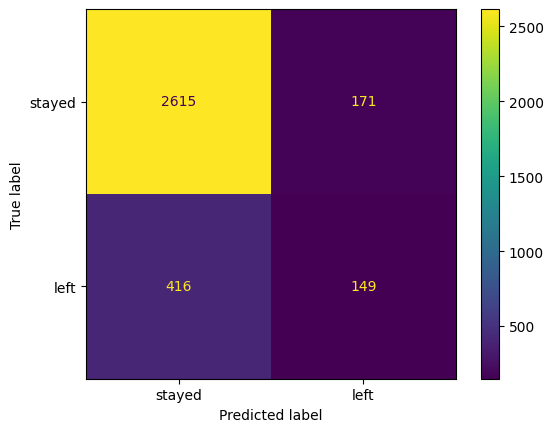

In [136]:
# Compute values for confusion matrix
LR_cm = confusion_matrix(y_test, y_pred, labels=LRmodel.classes_)

# Create display of confusion matrix
LR_disp = ConfusionMatrixDisplay(confusion_matrix=LR_cm, 
                                  display_labels=['stayed', 'left'],
                              )

# Plot confusion matrix
LR_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [138]:
# Create a classification report
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      2786
    Predicted would leave       0.47      0.26      0.34       565

                 accuracy                           0.82      3351
                macro avg       0.66      0.60      0.62      3351
             weighted avg       0.80      0.82      0.80      3351



The classification report above shows that the logistic regression model achieved a precision of 80%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

In [256]:
# Calculate accuracy, precision, recall, and F1 score on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.97
Precision: 0.91
Recall: 0.89
F1 Score: 0.90


### MODEL 2: DECISION TREE

In [158]:
#Instantiate the Decision Tree classifier
DTmodel = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 6, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': 'roc_auc',
}
# Instantiate the GridSearchCV object
DTgrid_search = GridSearchCV(DTmodel, param_grid, cv=5, n_jobs=-1, scoring=scoring, refit='roc_auc', verbose=1)


In [159]:
%%time
# Fit the model to the training data

DTgrid_search.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 375 ms
Wall time: 4.18 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 6, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'},
             verbose=1)

In [160]:
# Get the best parameters from the grid search
best_params = DTgrid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [161]:
# Instantiate the Decision Tree classifier with the best parameters
DTmodel = DecisionTreeClassifier(**best_params, random_state=0)
# Fit the model to the training data
DTmodel.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=10,
                       random_state=0)

In [162]:
# Check best AUC score on CV
best_auc = DTgrid_search.best_score_
print(f"Best AUC Score: {best_auc:.4f}")

Best AUC Score: 0.9720


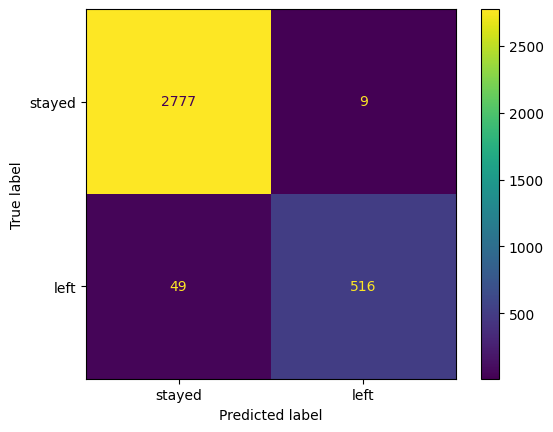

In [163]:
# Make predictions on the test set
y_pred = DTmodel.predict(X_test)
# Score the model (accuracy) on the test data
DTmodel.score(X_test, y_test)
# Compute values for confusion matrix
DT_cm = confusion_matrix(y_test, y_pred, labels=DTmodel.classes_)
# Create display of confusion matrix
DT_disp = ConfusionMatrixDisplay(confusion_matrix=DT_cm, 
                                  display_labels=['stayed', 'left'],
                              )
# Plot confusion matrix
DT_disp.plot(values_format='')
# Display plot
plt.show()

In [164]:
# Create a classification report
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))


                           precision    recall  f1-score   support

Predicted would not leave       0.98      1.00      0.99      2786
    Predicted would leave       0.98      0.91      0.95       565

                 accuracy                           0.98      3351
                macro avg       0.98      0.96      0.97      3351
             weighted avg       0.98      0.98      0.98      3351



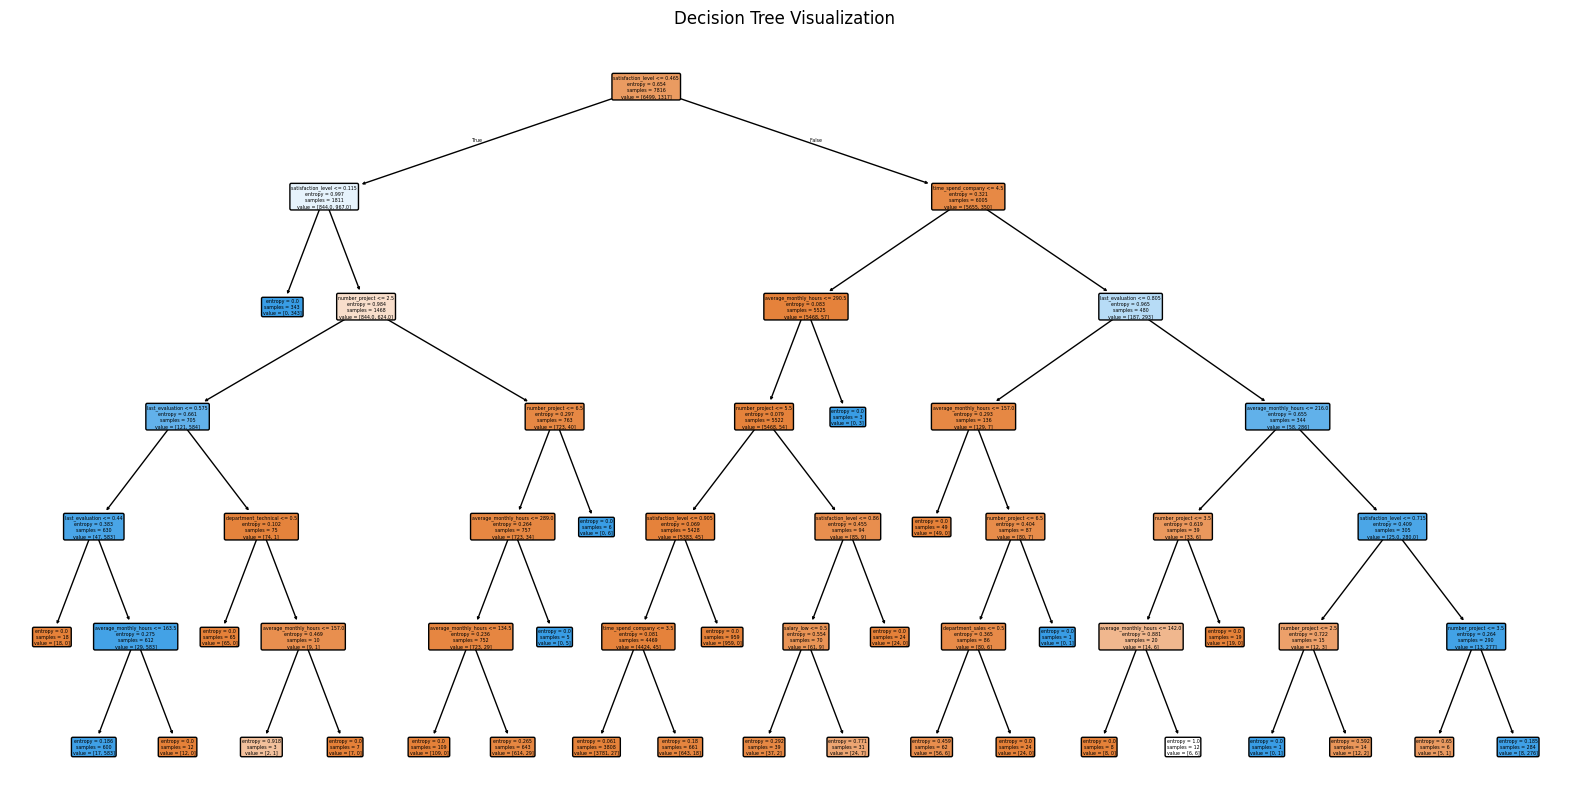

In [165]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(DTmodel, feature_names=X.columns, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


In [166]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    roc_auc = best_estimator_results.mean_test_roc_auc

  
    # Create table of results
    table = pd.DataFrame()
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy],
                          'ROC AUC': [roc_auc]})
  
    return table

In [168]:
#Create make results table for Decision Tree model
DT_results = make_results('Decision Tree', DTgrid_search)
#Display the results table
DT_results


,Model,F1,Recall,Precision,Accuracy,ROC AUC
0,Decision Tree,0.948934,0.919487,0.980557,0.983367,0.962639


These scores from the decision tree model are strong indicators of good model performance.
However, decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. Let's construct a random forest model.

### MODEL 3: RANDOM FOREST

In [169]:
# Instantiate the Random Forest classifier
RFmodel = RandomForestClassifier(random_state=0)
# Assign a dictionary of hyperparameters to search over
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 3, 6, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': 'roc_auc',
}
# Instantiate the GridSearchCV object
RFgrid_search = GridSearchCV(RFmodel, param_grid, cv=5, n_jobs=-1, scoring=scoring, refit='roc_auc', verbose=1)


In [171]:
%%time
# Fit the model to the training data
RFgrid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
CPU times: total: 1.31 s
Wall time: 16.5 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 6, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'},
             verbose=1)

## Pickle  

When models take a long time to fit, you don’t want to have to fit them more than once. If your kernel disconnects or you shut down the notebook and lose the cell’s output, you’ll have to refit the model, which can be frustrating and time-consuming. 

`pickle` is a tool that saves the fit model object to a specified location, then quickly reads it back in. It also allows you to use models that were fit somewhere else, without having to train them yourself.

In [193]:
#Define a path to save the model
os.makedirs('RFmodel', exist_ok=True)
model_path = 'RFmodel/random_forest_model.pkl'
# Save the model to disk
with open(model_path, 'wb') as file:
    pickle.dump(RFgrid_search, file)
# Load the model from disk
with open(model_path, 'rb') as file:
    loaded_RFmodel = pickle.load(file)

In [185]:
# Get the best parameters from the grid search
best_params = RFgrid_search.best_params_
print(f"Best Parameters: {best_params}")
# Instantiate the Random Forest classifier with the best parameters
RFmodel = RandomForestClassifier(**best_params, random_state=0)
# Fit the model to the training data
RFmodel.fit(X_train, y_train)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestClassifier(min_samples_leaf=4, n_estimators=50, random_state=0)

In [186]:
# Check best AUC score on CV
best_auc = RFgrid_search.best_score_
print(f"Best AUC Score: {best_auc:.4f}")

Best AUC Score: 0.9828


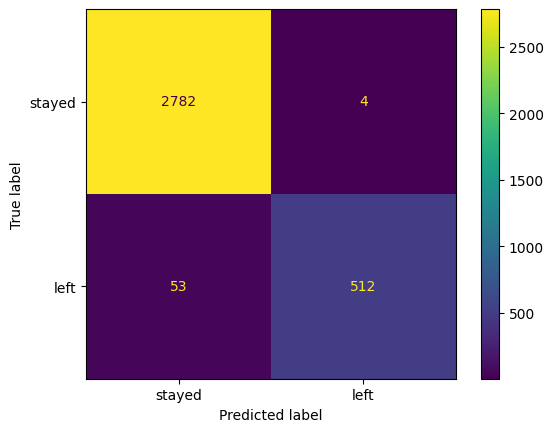

In [187]:
# Make predictions on the test set
y_pred = RFmodel.predict(X_test)
# Score the model (accuracy) on the test data
RFmodel.score(X_test, y_test)
# Compute values for confusion matrix
RF_cm = confusion_matrix(y_test, y_pred, labels=RFmodel.classes_)
# Create display of confusion matrix
RF_disp = ConfusionMatrixDisplay(confusion_matrix=RF_cm, 
                                  display_labels=['stayed', 'left'],
                              )
# Plot confusion matrix
RF_disp.plot(values_format='')
# Display plot
plt.show()

In [188]:
# Create a classification report
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))


                           precision    recall  f1-score   support

Predicted would not leave       0.98      1.00      0.99      2786
    Predicted would leave       0.99      0.91      0.95       565

                 accuracy                           0.98      3351
                macro avg       0.99      0.95      0.97      3351
             weighted avg       0.98      0.98      0.98      3351



In [189]:
#Create make results table for Random Forest model
RF_results = make_results('Random', RFgrid_search)
#Display the results table
# Concatentate Decision Tree model results table with Random Forest results table
results = pd.concat([DT_results, RF_results]).sort_values(by=['ROC AUC'], 
                                                           ascending=False)
results


,Model,F1,Recall,Precision,Accuracy,ROC AUC
0,Random,0.947400,0.911891,0.986258,0.982983,0.979175
0,Decision Tree,0.948934,0.919487,0.980557,0.983367,0.962639


The evaluation scores ROC AUC of the random forest model are slightly better than those of the decision tree model, with the exception of recall, f1 and accuracy is approximately 0.001 lower, which is a negligible amount. This indicates that the random forest model mostly outperforms the decision tree model.

Next, we can evaluate the final model on the test set.

In [262]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [194]:

y_pred_loaded = loaded_RFmodel.predict(X_test)
# Check if the predictions match the original model's predictions
assert np.array_equal(y_pred, y_pred_loaded), "Predictions do not match!"
# Display a message indicating that the model was saved and loaded successfully
print("Model saved and loaded successfully. Predictions match!")
# Save the model to a file
with open('RFmodel.pkl', 'wb') as file:
    pickle.dump(RFmodel, file)


Model saved and loaded successfully. Predictions match!


### MODEL 4. XGBOOST

In [195]:
#define xgb to be XGBClassifier

xgb = XGBClassifier(objective='binary:logistic', random_state=0) 

#define param_grid for xgb
param_grid = {
    'n_estimators': [10, 50, 100],
    'min_child_weight': [3,4,5,6],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': 'roc_auc',
}
# Instantiate the GridSearchCV object
XGBgrid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1, scoring=scoring, refit='roc_auc', verbose=1)

In [196]:
%%time
# Fit the model to the training data
XGBgrid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
CPU times: total: 1.59 s
Wall time: 16.9 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9],
                         'min_child_weight': [3, 4, 5, 6],
                         'n_estimators': [10, 50, 100],
                         'subsample': [0.8, 1.0]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'},
             verbose=1)

In [204]:
#pickle the model
# Define a path to save the model
os.makedirs('XGBmodel', exist_ok=True)
model_path = 'XGBmodel/xgb_model.pkl'
# Save the model to disk
with open(model_path, 'wb') as file:
    pickle.dump(XGBgrid_search, file)
# Load the model from disk
with open(model_path, 'rb') as file:
    loaded_XGBmodel = pickle.load(file)


In [197]:
# Get the best parameters from the grid search
best_params = XGBgrid_search.best_params_
print(f"Best Parameters: {best_params}")
# Instantiate the XGBoost classifier with the best parameters
XGBmodel = XGBClassifier(**best_params, random_state=0)
# Fit the model to the training data
XGBmodel.fit(X_train, y_train)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 1.0}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [198]:
# Check best AUC score on CV
best_auc = XGBgrid_search.best_score_
print(f"Best AUC Score: {best_auc:.4f}")

Best AUC Score: 0.9850


In [199]:
# Make predictions on the test set
y_pred = XGBmodel.predict(X_test)
# Score the model (accuracy) on the test data
XGBmodel.score(X_test, y_test)


0.9829901521933752

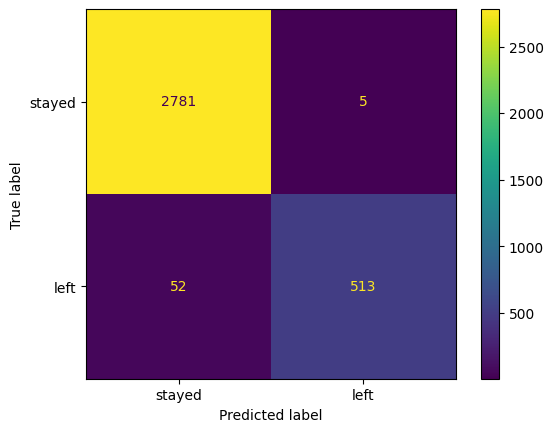

In [200]:
# Compute values for confusion matrix
XGB_cm = confusion_matrix(y_test, y_pred, labels=XGBmodel.classes_)
# Create display of confusion matrix
XGB_disp = ConfusionMatrixDisplay(confusion_matrix=XGB_cm, 
                                  display_labels=['stayed', 'left'],
                              )
# Plot confusion matrix
XGB_disp.plot(values_format='')
# Display plot
plt.show()


In [201]:
# Create a classification report
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))


                           precision    recall  f1-score   support

Predicted would not leave       0.98      1.00      0.99      2786
    Predicted would leave       0.99      0.91      0.95       565

                 accuracy                           0.98      3351
                macro avg       0.99      0.95      0.97      3351
             weighted avg       0.98      0.98      0.98      3351



In [202]:
#Create make results table for XGBoost model
XGB_results = make_results('XGBoost', XGBgrid_search)
#Display the results table
# Concatentate Decision Tree model results table with Random Forest results table
results = pd.concat([DT_results, RF_results, XGB_results]).sort_values(by=['ROC AUC'], 
                                                           ascending=False)
# Display the results table
results

,Model,F1,Recall,Precision,Accuracy,ROC AUC
0,XGBoost,0.946807,0.914172,0.982167,0.982727,0.984443
0,Random,0.947400,0.911891,0.986258,0.982983,0.979175
0,Decision Tree,0.948934,0.919487,0.980557,0.983367,0.962639


We're ready to select a champion model! Based on the above table, it's clear that our XGBoost model has the top ROC AUC score on the validation data by a small margin. 

In [205]:
y_pred_loaded = loaded_XGBmodel.predict(X_test)
# Check if the predictions match the original model's predictions
assert np.array_equal(y_pred, y_pred_loaded), "Predictions do not match!"
# Display a message indicating that the model was saved and loaded successfully
print("Model saved and loaded successfully. Predictions match!")
# Save the model to a file
with open('XGBmodel.pkl', 'wb') as file:
    pickle.dump(XGBmodel, file)
    

Model saved and loaded successfully. Predictions match!


### FEATURE ENGINEERING

Dropping satisfaction_level for the next model makes sense for several important reasons:

Potential data leakage: Satisfaction level could be strongly linked to an employee's decision to leave. In fact, an employee who has already decided to quit might report lower satisfaction, making this variable essentially "leak" information about the target variable we're trying to predict.

Real-world availability: As mentioned, the company likely won't have satisfaction levels for all employees in a real deployment scenario. Satisfaction surveys are typically periodic, voluntary, and might not be available for new employees or at the exact time we need to make predictions.

Model robustness: Building a model that doesn't rely on satisfaction data creates a more robust solution that can work even when this information is unavailable.

Testing a hypothesis: By creating a model without this potentially leaky feature, we can compare performance metrics. If there's a significant drop in accuracy, it suggests satisfaction_level was indeed contributing to artificially high performance.

Focus on actionable features: Creating an overworked feature based on average_monthly_hours transforms raw data into something more interpretable and potentially actionable for HR departments.

However, do note that if the average_monthly_hours feature is also potentially leaky, we should consider how to handle that as well - perhaps by transforming it into the overworked feature we mentioned rather than using the raw hours data.

In [206]:
df1.head(10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.11,0.88,7,272,4,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.72,0.87,5,223,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.37,0.52,2,159,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.41,0.50,2,153,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.10,0.77,6,247,4,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,0.92,0.85,5,259,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.89,1.00,5,224,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0.42,0.53,2,142,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.45,0.54,2,135,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [208]:
#Add the 'overworked' column to the dataframe
df1['overworked'] = df1['average_monthly_hours'] > 166.67
#Convert the 'overworked' column to numeric (0 or 1)
df1['overworked'] = df1['overworked'].astype(int)
#Display the first few rows of the updated dataframe
df1.head(10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,overworked
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,0.11,0.88,7,272,4,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
2,0.72,0.87,5,223,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
3,0.37,0.52,2,159,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,0.41,0.50,2,153,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
5,0.10,0.77,6,247,4,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
6,0.92,0.85,5,259,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
7,0.89,1.00,5,224,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
8,0.42,0.53,2,142,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
9,0.45,0.54,2,135,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [209]:
#Drop the 'average_monthly_hours' & 'satisfaction _level' column from the dataframe
df2 = df1.drop(['average_monthly_hours', 'satisfaction_level'], axis=1)
#Display the first few rows of the updated dataframe
df2.head()


,last_evaluation,number_project,time_spend_company,work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,overworked
0,0.53,2,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,0.88,7,4,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
2,0.87,5,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
3,0.52,2,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,0.50,2,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [210]:
#Isolate the target variable and features
X = df2.drop('left', axis=1)
y = df2['left']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Decision Tree Model - Round 2

In [214]:
#Instantiate Decision Tree classifier
DTmodel2 = DecisionTreeClassifier(random_state=0)
# Assign a dictionary of hyperparameters to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 6, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': 'roc_auc',
}
# Instantiate the GridSearchCV object
DTgrid_search2 = GridSearchCV(DTmodel2, param_grid, cv=5, n_jobs=-1, scoring=scoring, refit='roc_auc', verbose=1)

In [215]:
%%time
# Fit the model to the training data
DTgrid_search2.fit(X_train, y_train)
# Get the best parameters from the grid search

Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 516 ms
Wall time: 3.31 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 6, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'},
             verbose=1)

In [216]:
best_params = DTgrid_search2.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [217]:
# Save the model to disk
model_path = 'DTmodel2/decision_tree_model.pkl'
os.makedirs('DTmodel2', exist_ok=True)
with open(model_path, 'wb') as file:
    pickle.dump(DTgrid_search2, file)
# Load the model from disk
with open(model_path, 'rb') as file:
    loaded_DTmodel2 = pickle.load(file)

In [218]:
# Instantiate the Decision Tree classifier with the best parameters
DTmodel2 = DecisionTreeClassifier(**best_params, random_state=0)
# Fit the model to the training data
DTmodel2.fit(X_train, y_train)
# Check best AUC score on CV
best_auc = DTgrid_search2.best_score_
print(f"Best AUC Score: {best_auc:.4f}")

Best AUC Score: 0.9650


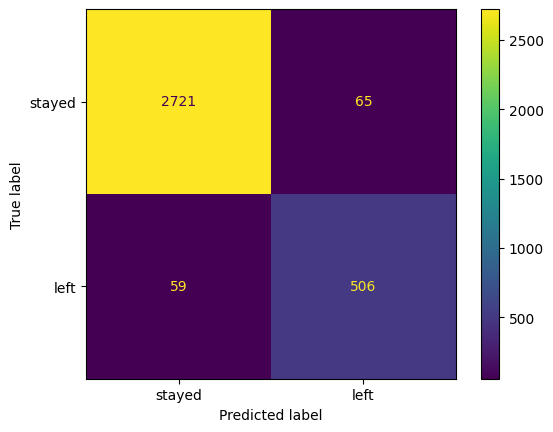

In [219]:
# Make predictions on the test set
y_pred = DTmodel2.predict(X_test)
# Score the model (accuracy) on the test data
DTmodel2.score(X_test, y_test)
# Compute values for confusion matrix
DT_cm2 = confusion_matrix(y_test, y_pred, labels=DTmodel2.classes_)
# Create display of confusion matrix
DT_disp2 = ConfusionMatrixDisplay(confusion_matrix=DT_cm2, 
                                  display_labels=['stayed', 'left'],
                              )
# Plot confusion matrix
DT_disp2.plot(values_format='')
# Display plot
plt.show()

In [220]:
# Create a classification report
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.98      0.98      2786
    Predicted would leave       0.89      0.90      0.89       565

                 accuracy                           0.96      3351
                macro avg       0.93      0.94      0.93      3351
             weighted avg       0.96      0.96      0.96      3351



In [257]:
#Create make results table for Decision Tree model
DT_results2 = make_results('Decision Tree Round 2', DTgrid_search2)
#Display the results table
# Concatentate Decision Tree model results table with Random Forest results table
results2 = pd.concat([DT_results2]).sort_values(by=['ROC AUC'], 
                                                           ascending=False)
# Display the results table
results2

,Model,F1,Recall,Precision,Accuracy,ROC AUC
0,Decision Tree Round 2,0.908608,0.902025,0.915523,0.969421,0.954907


In [263]:
#Calculate get_scores for Decision Tree model test set
DT_scores2 = get_scores('Decision Tree Round 2', DTgrid_search2, X_test, y_test)
#Display the results table
DT_scores2 

,model,precision,recall,f1,accuracy,AUC
0,Decision Tree Round 2,0.886165,0.895575,0.890845,0.962996,0.936122


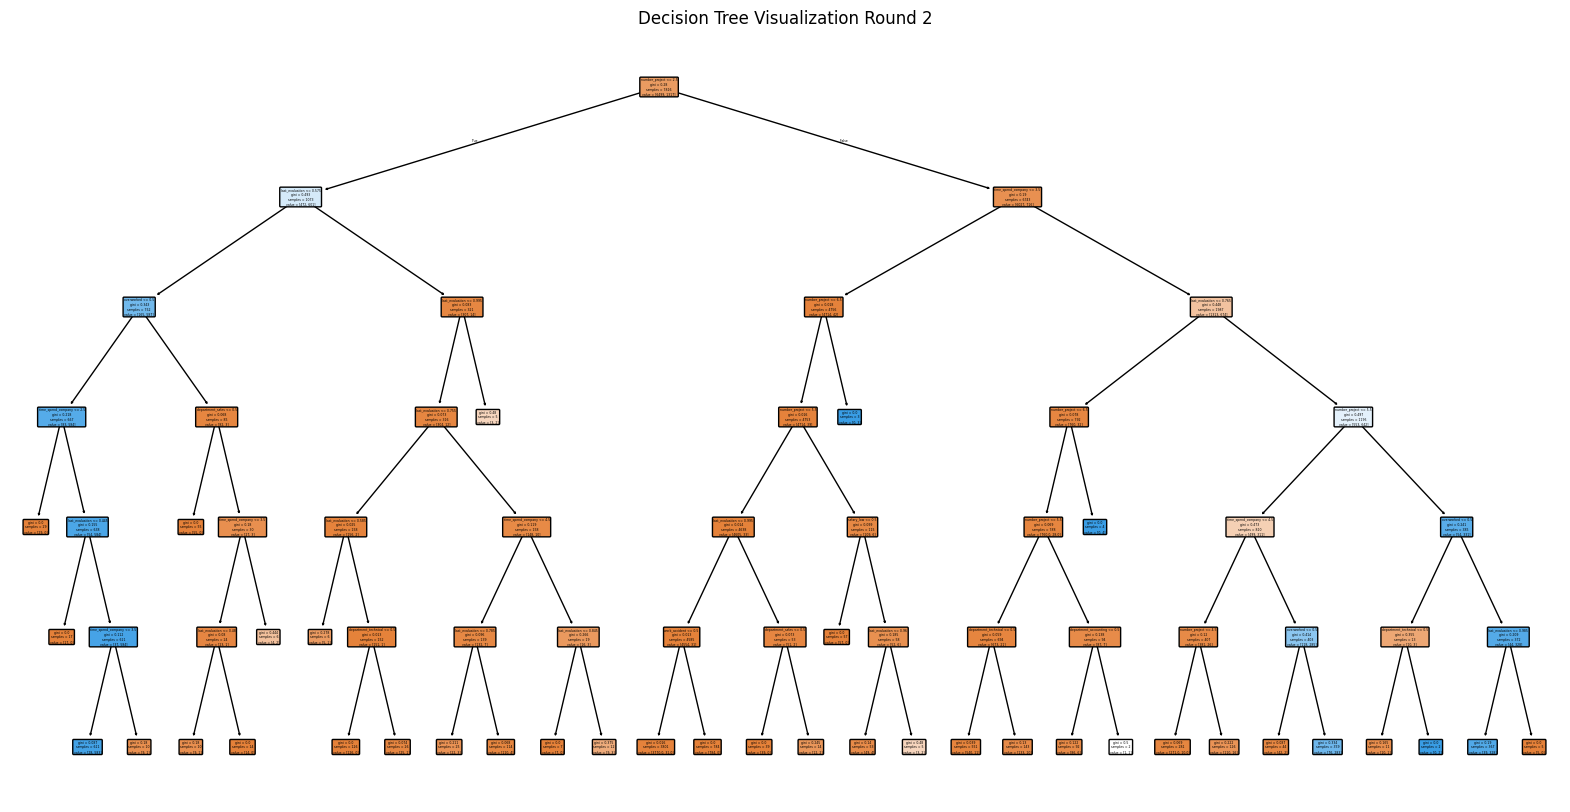

In [223]:
#Create plot tree for Decision Tree model
plt.figure(figsize=(20, 10))
plot_tree(DTmodel2, feature_names=X.columns, filled=True, rounded=True)
plt.title('Decision Tree Visualization Round 2')
plt.show()

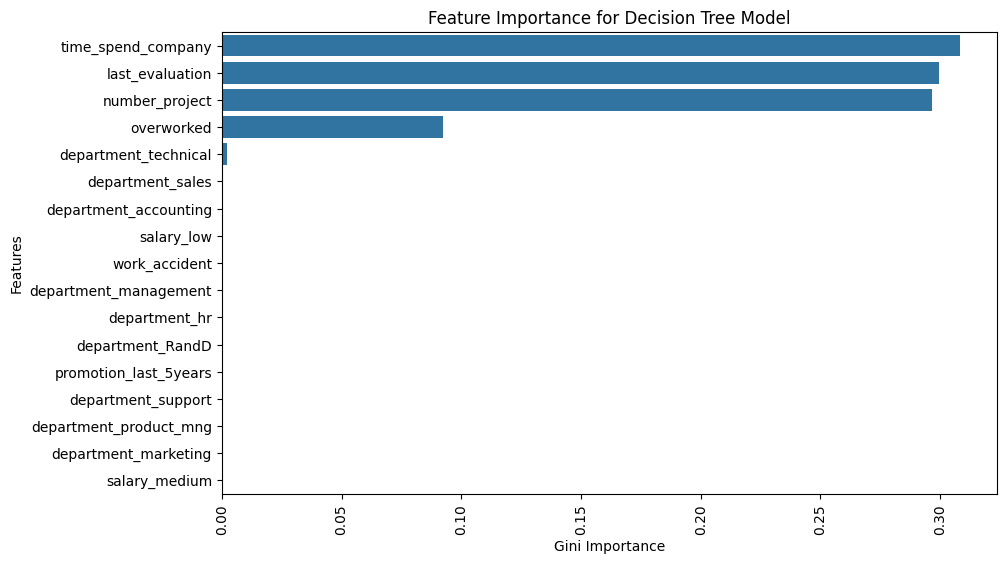

In [254]:
#Create a bar plot of feature importance for decision tree model
DT2_importance = pd.DataFrame(DTmodel2.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns)
DT2_importance = DT2_importance.sort_values(by='gini_importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y=DT2_importance.index, x=DT2_importance['gini_importance'])
plt.title('Feature Importance for Decision Tree Model')
plt.xticks(rotation=90)
plt.ylabel('Features')
plt.xlabel('Gini Importance')
plt.show()

The barplot above shows that in this decision tree model, tenure, last_evaluation, number_project,, and overworked have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left

### Random Forest Model - Round 2

In [233]:
#Instantiate the Random Forest classifier
RFmodel2 = RandomForestClassifier(random_state=0)
# Assign a dictionary of hyperparameters to search over
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 3, 6, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': 'roc_auc',
}
# Instantiate the GridSearchCV object
RFgrid_search2 = GridSearchCV(RFmodel2, param_grid, cv=5, n_jobs=-1, scoring=scoring, refit='roc_auc', verbose=1)


In [234]:
%%time
# Fit the model to the training data
RFgrid_search2.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
CPU times: total: 1.25 s
Wall time: 14 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 6, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'},
             verbose=1)

In [235]:
# Get the best parameters from the grid search
best_params = RFgrid_search2.best_params_
print(f"Best Parameters: {best_params}")


Best Parameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [236]:
# Save the model to disk
model_path = 'RFmodel2/random_forest_model.pkl'
os.makedirs('RFmodel2', exist_ok=True)
with open(model_path, 'wb') as file:
    pickle.dump(RFgrid_search2, file)
# Load the model from disk
with open(model_path, 'rb') as file:
    loaded_RFmodel2 = pickle.load(file)
    

In [237]:
# Instantiate the Random Forest classifier with the best parameters
RFmodel2 = RandomForestClassifier(**best_params, random_state=0)
# Fit the model to the training data
RFmodel2.fit(X_train, y_train)
# Check best AUC score on CV
best_auc = RFgrid_search2.best_score_
print(f"Best AUC Score: {best_auc:.4f}")

Best AUC Score: 0.9713


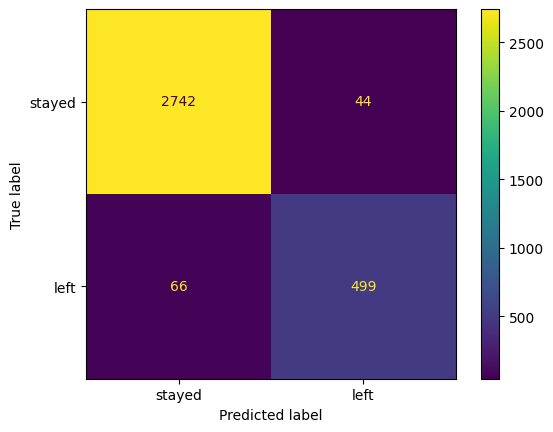

In [238]:
# Make predictions on the test set
y_pred = RFmodel2.predict(X_test)
# Score the model (accuracy) on the test data
RFmodel2.score(X_test, y_test)
# Compute values for confusion matrix
RF_cm2 = confusion_matrix(y_test, y_pred, labels=RFmodel2.classes_)
# Create display of confusion matrix
RF_disp2 = ConfusionMatrixDisplay(confusion_matrix=RF_cm2, 
                                  display_labels=['stayed', 'left'],
                              )
# Plot confusion matrix
RF_disp2.plot(values_format='')
# Display plot
plt.show()

In [239]:
# Create a classification report
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))


                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.98      0.98      2786
    Predicted would leave       0.92      0.88      0.90       565

                 accuracy                           0.97      3351
                macro avg       0.95      0.93      0.94      3351
             weighted avg       0.97      0.97      0.97      3351



In [241]:
#Create make results table for Random Forest model
RF_results2 = make_results('Random Forest Round 2', RFgrid_search2)
#Display the results table
# Concatentate Decision Tree model results table with Random Forest results table
results2 = pd.concat([DT_results2, RF_results2]).sort_values(by=['ROC AUC'], 
                                                           ascending=False)
# Display the results table
results2

,Model,F1,Recall,Precision,Accuracy,ROC AUC
0,Random Forest Round 2,0.903641,0.889887,0.918000,0.968014,0.971048
0,Decision Tree Round 2,0.908608,0.902025,0.915523,0.969421,0.954907


In [264]:
#Calculate get_scores for Random Forest model test set
RF_scores2 = get_scores('Random Forest Round 2', RFgrid_search2, X_test, y_test)
#Concatentate Decision Tree model test results table with Random Forest test results table
scores2 = pd.concat([DT_scores2, RF_scores2]).sort_values(by=['AUC'], 
                                                           ascending=False)
# Display the results table
scores2

,model,precision,recall,f1,accuracy,AUC
0,Decision Tree Round 2,0.886165,0.895575,0.890845,0.962996,0.936122
0,Random Forest Round 2,0.918969,0.883186,0.900722,0.967174,0.933696


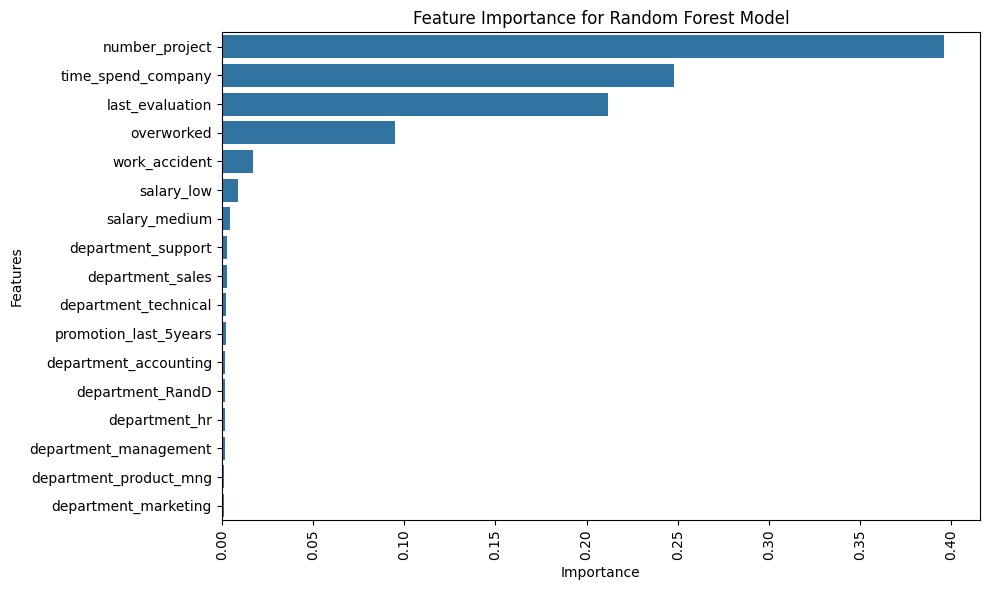

In [244]:
#Create a feature importance plot for Random Forest model
RF2_importance = pd.DataFrame(RFgrid_search2.best_estimator_.feature_importances_,
                             columns=['importance'], 
                             index=X.columns)
RF2_importance = RF2_importance.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y=RF2_importance.index, x=RF2_importance['importance'])
plt.title('Feature Importance for Random Forest Model')
plt.xticks(rotation=90)
plt.ylabel('Features')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()



The plot above shows that in this random forest model, number_project, tenure, last_evaluation and overworked have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left, and they are the same as the ones used by the decision tree model.

In [245]:
#Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
#Define param_grid for xgb
param_grid = {
    'n_estimators': [10, 50, 100],
    'min_child_weight': [3,4,5,6],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': 'roc_auc',
}
# Instantiate the GridSearchCV object
XGBgrid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1, scoring=scoring, refit='roc_auc', verbose=1)

In [246]:
%%time
# Fit the model to the training data
XGBgrid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
CPU times: total: 2.59 s
Wall time: 19.4 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9],
                         'min_child_weight': [3, 4, 5, 6],
                         'n_estimators': [10, 50, 100],
                         'subsample': [0.8, 1.0]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'},
             verbose=1)

In [247]:
# Get the best parameters from the grid search
best_params = XGBgrid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 1.0}


In [248]:
# Save the model to disk
model_path = 'XGBmodel2/xgb_model.pkl'
os.makedirs('XGBmodel2', exist_ok=True)
with open(model_path, 'wb') as file:
    pickle.dump(XGBgrid_search, file)
# Load the model from disk
with open(model_path, 'rb') as file:
    loaded_XGBmodel2 = pickle.load(file)

In [249]:
# Instantiate the XGBoost classifier with the best parameters
XGBmodel2 = XGBClassifier(**best_params, random_state=0)
# Fit the model to the training data
XGBmodel2.fit(X_train, y_train)
# Check best AUC score on CV
best_auc = XGBgrid_search.best_score_
print(f"Best AUC Score: {best_auc:.4f}")

Best AUC Score: 0.9741


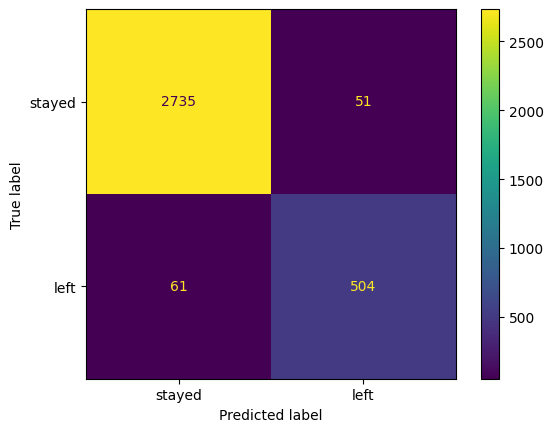

In [250]:
# Make predictions on the test set
y_pred = XGBmodel2.predict(X_test)
# Score the model (accuracy) on the test data
XGBmodel2.score(X_test, y_test)
# Compute values for confusion matrix
XGB_cm2 = confusion_matrix(y_test, y_pred, labels=XGBmodel2.classes_)
# Create display of confusion matrix
XGB_disp2 = ConfusionMatrixDisplay(confusion_matrix=XGB_cm2, 
                                  display_labels=['stayed', 'left'],
                              )
# Plot confusion matrix
XGB_disp2.plot(values_format='')
# Display plot
plt.show()

In [251]:
# Create a classification report
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))


                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.98      0.98      2786
    Predicted would leave       0.91      0.89      0.90       565

                 accuracy                           0.97      3351
                macro avg       0.94      0.94      0.94      3351
             weighted avg       0.97      0.97      0.97      3351



In [252]:
#Create make results table for XGBoost model
XGB_results2 = make_results('XGBoost Round 2', XGBgrid_search)
#Display the results table
# Concatentate Decision Tree model results table with Random Forest results table
results2 = pd.concat([DT_results2, RF_results2, XGB_results2]).sort_values(by=['ROC AUC'], 
                                                           ascending=False)
# Display the results table
results2

,Model,F1,Recall,Precision,Accuracy,ROC AUC
0,XGBoost Round 2,0.905125,0.902022,0.908538,0.968142,0.972880
0,Random Forest Round 2,0.903641,0.889887,0.918000,0.968014,0.971048
0,Decision Tree Round 2,0.908608,0.902025,0.915523,0.969421,0.954907


The scores dropped slightly when we removed 'satisfaction level' and create 'overworked' column, and the XGBoost model still performs better than the random forest and decision tree if using AUC as the deciding metric.

In [265]:
#Calculate get_scores for XGBoost model test set
XGB_scores2 = get_scores('XGBoost Round 2', XGBgrid_search, X_test, y_test)
#Concatentate Decision Tree model test results table, Random Forest test results table with XGBoost test results table
scores2 = pd.concat([DT_scores2, RF_scores2, XGB_scores2]).sort_values(by=['AUC'], 
                                                           ascending=False)
# Display the results table
scores2

,model,precision,recall,f1,accuracy,AUC
0,XGBoost Round 2,0.908108,0.892035,0.900000,0.966577,0.936865
0,Decision Tree Round 2,0.886165,0.895575,0.890845,0.962996,0.936122
0,Random Forest Round 2,0.918969,0.883186,0.900722,0.967174,0.933696


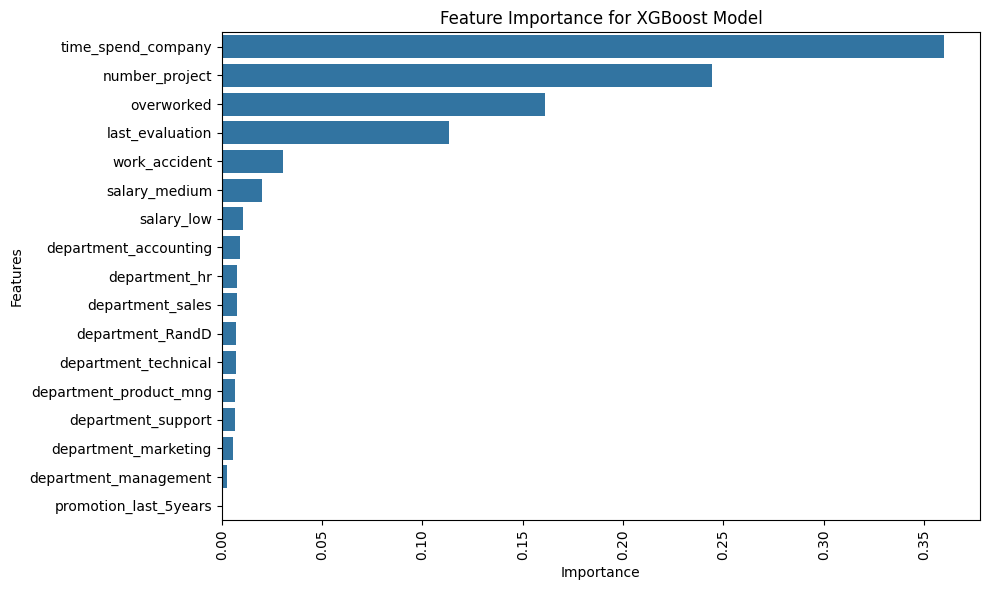

In [255]:
#Create a feature importance plot for XGBoost model
XGB2_importance = pd.DataFrame(XGBmodel2.feature_importances_, 
                             columns=['importance'], 
                             index=X.columns)
XGB2_importance = XGB2_importance.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y=XGB2_importance.index, x=XGB2_importance['importance'])
plt.title('Feature Importance for XGBoost Model')
plt.xticks(rotation=90)
plt.ylabel('Features')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()



The barplot above shows that in this XGBoost model, tenure, number_project, overworked and last_evaluation have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left, almost the same as the previous random forest & decision tree model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






The choice of evaluation metric depends on your specific problem context and what's most important for your application. Here's guidance on when to use each metric:
Accuracy

Use when classes are balanced and false positives/negatives have similar importance
Best for general classification where all types of errors are equally problematic
Example: General image classification where all categories are equally important

Precision

Use when false positives are more costly than false negatives
Best when you want to be confident that positive predictions are correct
Example: Spam detection (better to miss some spam than flag legitimate emails)

Recall

Use when false negatives are more costly than false positives
Best when you need to capture as many positive cases as possible
Example: Cancer screening (better to have false alarms than miss actual cases)

F1 Score

Use when you need a balance between precision and recall
Best for imbalanced datasets where both types of errors matter
Example: Fraud detection where you need to catch fraud without excessive false alarms

AUC-ROC

Use to evaluate model's ability to distinguish between classes, independent of threshold
Best for comparing model performance across different thresholds
Example: When you want to compare overall discriminative power of different models

The best metric depends on your application:

If your classes are balanced and all errors are equally costly, optimize for accuracy
If missing positive cases is very costly, optimize for recall
If falsely flagging negatives as positives is very costly, optimize for precision
If you need to balance the trade-off between the two, optimize for F1

When in doubt about the business context, F1 score is often a good default for classification problems with some class imbalance.

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Logistic Regression

The logistic regression model achievedachieved a precision of 91%, recall of 89%, f1-score of 90% (all weighted averages), and accuracy of 97%, on the test set. 

Tree-based Machine Learning

After conducting feature engineering, the XGBoost model achieved AUC of 93.7%, precision of 90.9%, recall of 89.2%, f1-score of 90%, and accuracy of 96.7%, on the test set. The XGBoost model modestly outperform decision tree & random forest model based on AUC ROC scores.

In [266]:
scores2

,model,precision,recall,f1,accuracy,AUC
0,XGBoost Round 2,0.908108,0.892035,0.900000,0.966577,0.936865
0,Decision Tree Round 2,0.886165,0.895575,0.890845,0.962996,0.936122
0,Random Forest Round 2,0.918969,0.883186,0.900722,0.967174,0.933696


### Conclusion, Recommendations, Next Steps

# Conclusion, Recommendations, and Next Steps

## Conclusion

The analysis of employee attrition data revealed several critical insights about why employees are leaving the company. Multiple machine learning models were developed and evaluated, with tree-based models (Decision Tree, Random Forest, and XGBoost) outperforming Logistic Regression. Even after removing potentially leaky features like satisfaction levels, the models maintained strong predictive power with 96-97% accuracy.

Key findings from the models and feature importance analysis show that employee departures are strongly associated with:

1. **Tenure** - Employees with 4+ years at the company show higher attrition
2. **Project workload** - Higher number of projects correlates with departures
3. **Working hours** - Employees working excessive hours (overworked) are more likely to leave
4. **Evaluation scores** - Evaluation practices may be contributing to attrition

These patterns suggest a work environment where employees become increasingly overworked over time without corresponding recognition or advancement opportunities, eventually leading them to seek employment elsewhere.

## Recommendations

Based on our analysis, we recommend the following interventions to improve employee retention:

1. **Manage workload distribution**
   - Implement a system to cap the number of concurrent projects per employee
   - Create clearer guidelines on reasonable work expectations
   - Monitor and balance project assignments across teams

2. **Review promotion and recognition practices**
   - Establish a structured review process for employees approaching 4-year tenure
   - Create clear advancement pathways and timeline expectations
   - Consider alternative recognition methods beyond traditional promotions

3. **Address work-life balance**
   - Implement policies that discourage excessive working hours
   - Review overtime compensation practices and ensure they're properly communicated
   - Consider flexible work arrangements that accommodate personal needs

4. **Reform evaluation practices**
   - Decouple evaluation scores from working hours/volume of work
   - Develop more holistic performance metrics that value quality and impact
   - Increase frequency of performance conversations for early intervention

5. **Improve company culture**
   - Conduct team-level and company-wide discussions about workload and expectations
   - Survey employees about specific pain points in their departments
   - Create formal and informal channels for addressing workplace concerns

## Next Steps

While our models provide valuable insights, further analysis could strengthen understanding and intervention effectiveness:

1. **Additional feature engineering**
   - Remove `last_evaluation` to test for potential data leakage
   - Create more nuanced workload measures combining hours and project count
   - Investigate interaction effects between tenure and other variables

2. **Alternative modeling approaches**
   - Develop models to predict satisfaction or performance scores
   - Consider time-series analysis to understand how attrition risk evolves
   - Implement model monitoring to track prediction effectiveness over time

3. **Validation with new data**
   - Collect exit interview data to validate model findings
   - Track employee engagement metrics alongside attrition predictions
   - Monitor impact of interventions on both predicted and actual attrition

4. **Pilot interventions**
   - Implement recommended changes in select departments first
   - Measure effectiveness before company-wide rollout
   - Develop a feedback loop for continuous improvement

By taking these steps, the company can address the underlying causes of employee attrition, create a healthier work environment, and ultimately improve retention of valuable talent.